In [4]:
import pandas as pd
import matplotlib.pyplot as plt

PATH = '../data/'
df = pd.read_csv(PATH + 'BIT_2023.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        8760 non-null   object 
 1   Open        8736 non-null   float64
 2   High        8736 non-null   float64
 3   Low         8736 non-null   float64
 4   Close       8736 non-null   float64
 5   Volume      8760 non-null   float64
 6   returns     8748 non-null   float64
 7   volatility  8574 non-null   float64
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [6]:
df.describe()

Open          High           Low         Close         Volume  \
count   8736.000000   8736.000000   8736.000000   8736.000000    8760.000000   
mean   28804.130540  28891.935085  28716.037191  28807.059467   17056.460292   
std     5888.434989   5908.192988   5867.904464   5888.802865   20699.978444   
min    16504.300000  16524.900000  16488.000000  16504.200000       0.000000   
25%    25921.375000  25991.775000  25860.850000  25922.600000    6064.877750   
50%    27708.550000  27821.450000  27622.150000  27710.050000   10470.787500   
75%    30276.050000  30332.700000  30221.850000  30276.250000   19544.913500   
max    44572.000000  44779.300000  44265.700000  44572.000000  355275.447000   

           returns   volatility  
count  8748.000000  8574.000000  
mean      0.000118     0.003896  
std       0.004563     0.002423  
min      -0.062584     0.000453  
25%      -0.001524     0.002256  
50%       0.000071     0.003361  
75%       0.001705     0.004896  
max       0.055638     0.020826

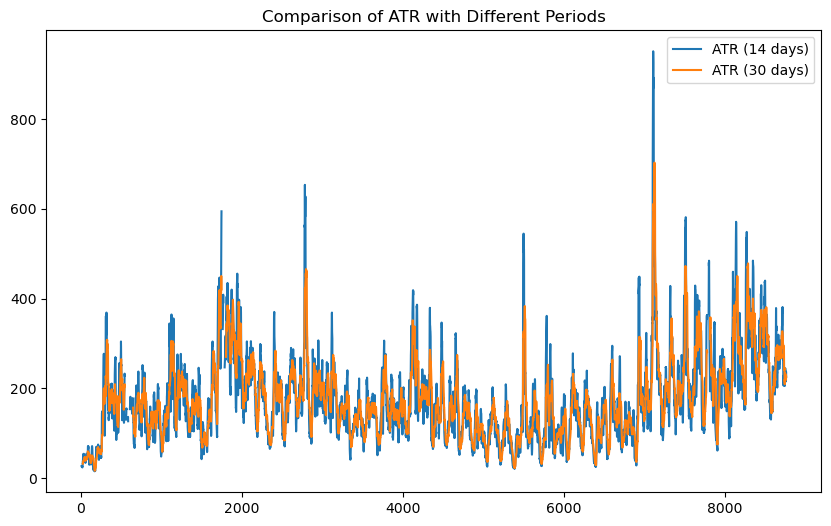

In [7]:
# True Range 계산
df['HL'] = df['High'] - df['Low']
df['HC'] = abs(df['High'] - df['Close'].shift(1))
df['LC'] = abs(df['Low'] - df['Close'].shift(1))
df['TR'] = df[['HL', 'HC', 'LC']].max(axis=1)
df = df.drop(['HL', 'HC', 'LC'], axis=1)

# ATR 계산 (14일 기간)
df['ATR_14'] = df['TR'].rolling(window=14).mean()

# ATR 계산 (30일 기간)
df['ATR_30'] = df['TR'].rolling(window=30).mean()

# 그래프 플로팅
plt.figure(figsize=(10, 6))
plt.plot(df['ATR_14'], label='ATR (14 days)')
plt.plot(df['ATR_30'], label='ATR (30 days)')
plt.title('Comparison of ATR with Different Periods')
plt.legend()
plt.show()

### 이상치

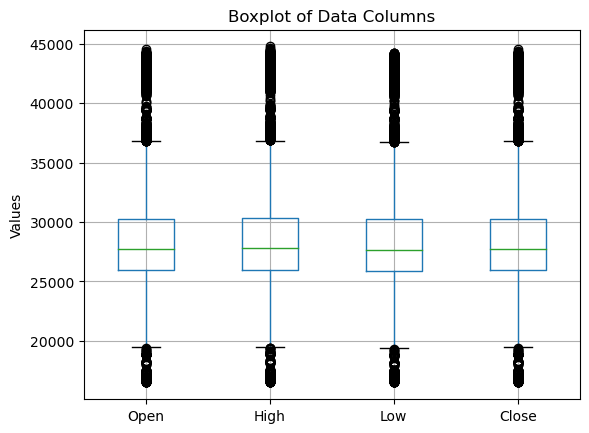

In [24]:
# 상자그림(Boxplot)을 그리기
df.boxplot(column=['Open', 'High', 'Low', 'Close'])
plt.title('Boxplot of Data Columns')
plt.ylabel('Values')
plt.show()

In [11]:
df['time'] = pd.to_datetime(df['time'])

In [12]:
df.set_index('time', inplace=True)

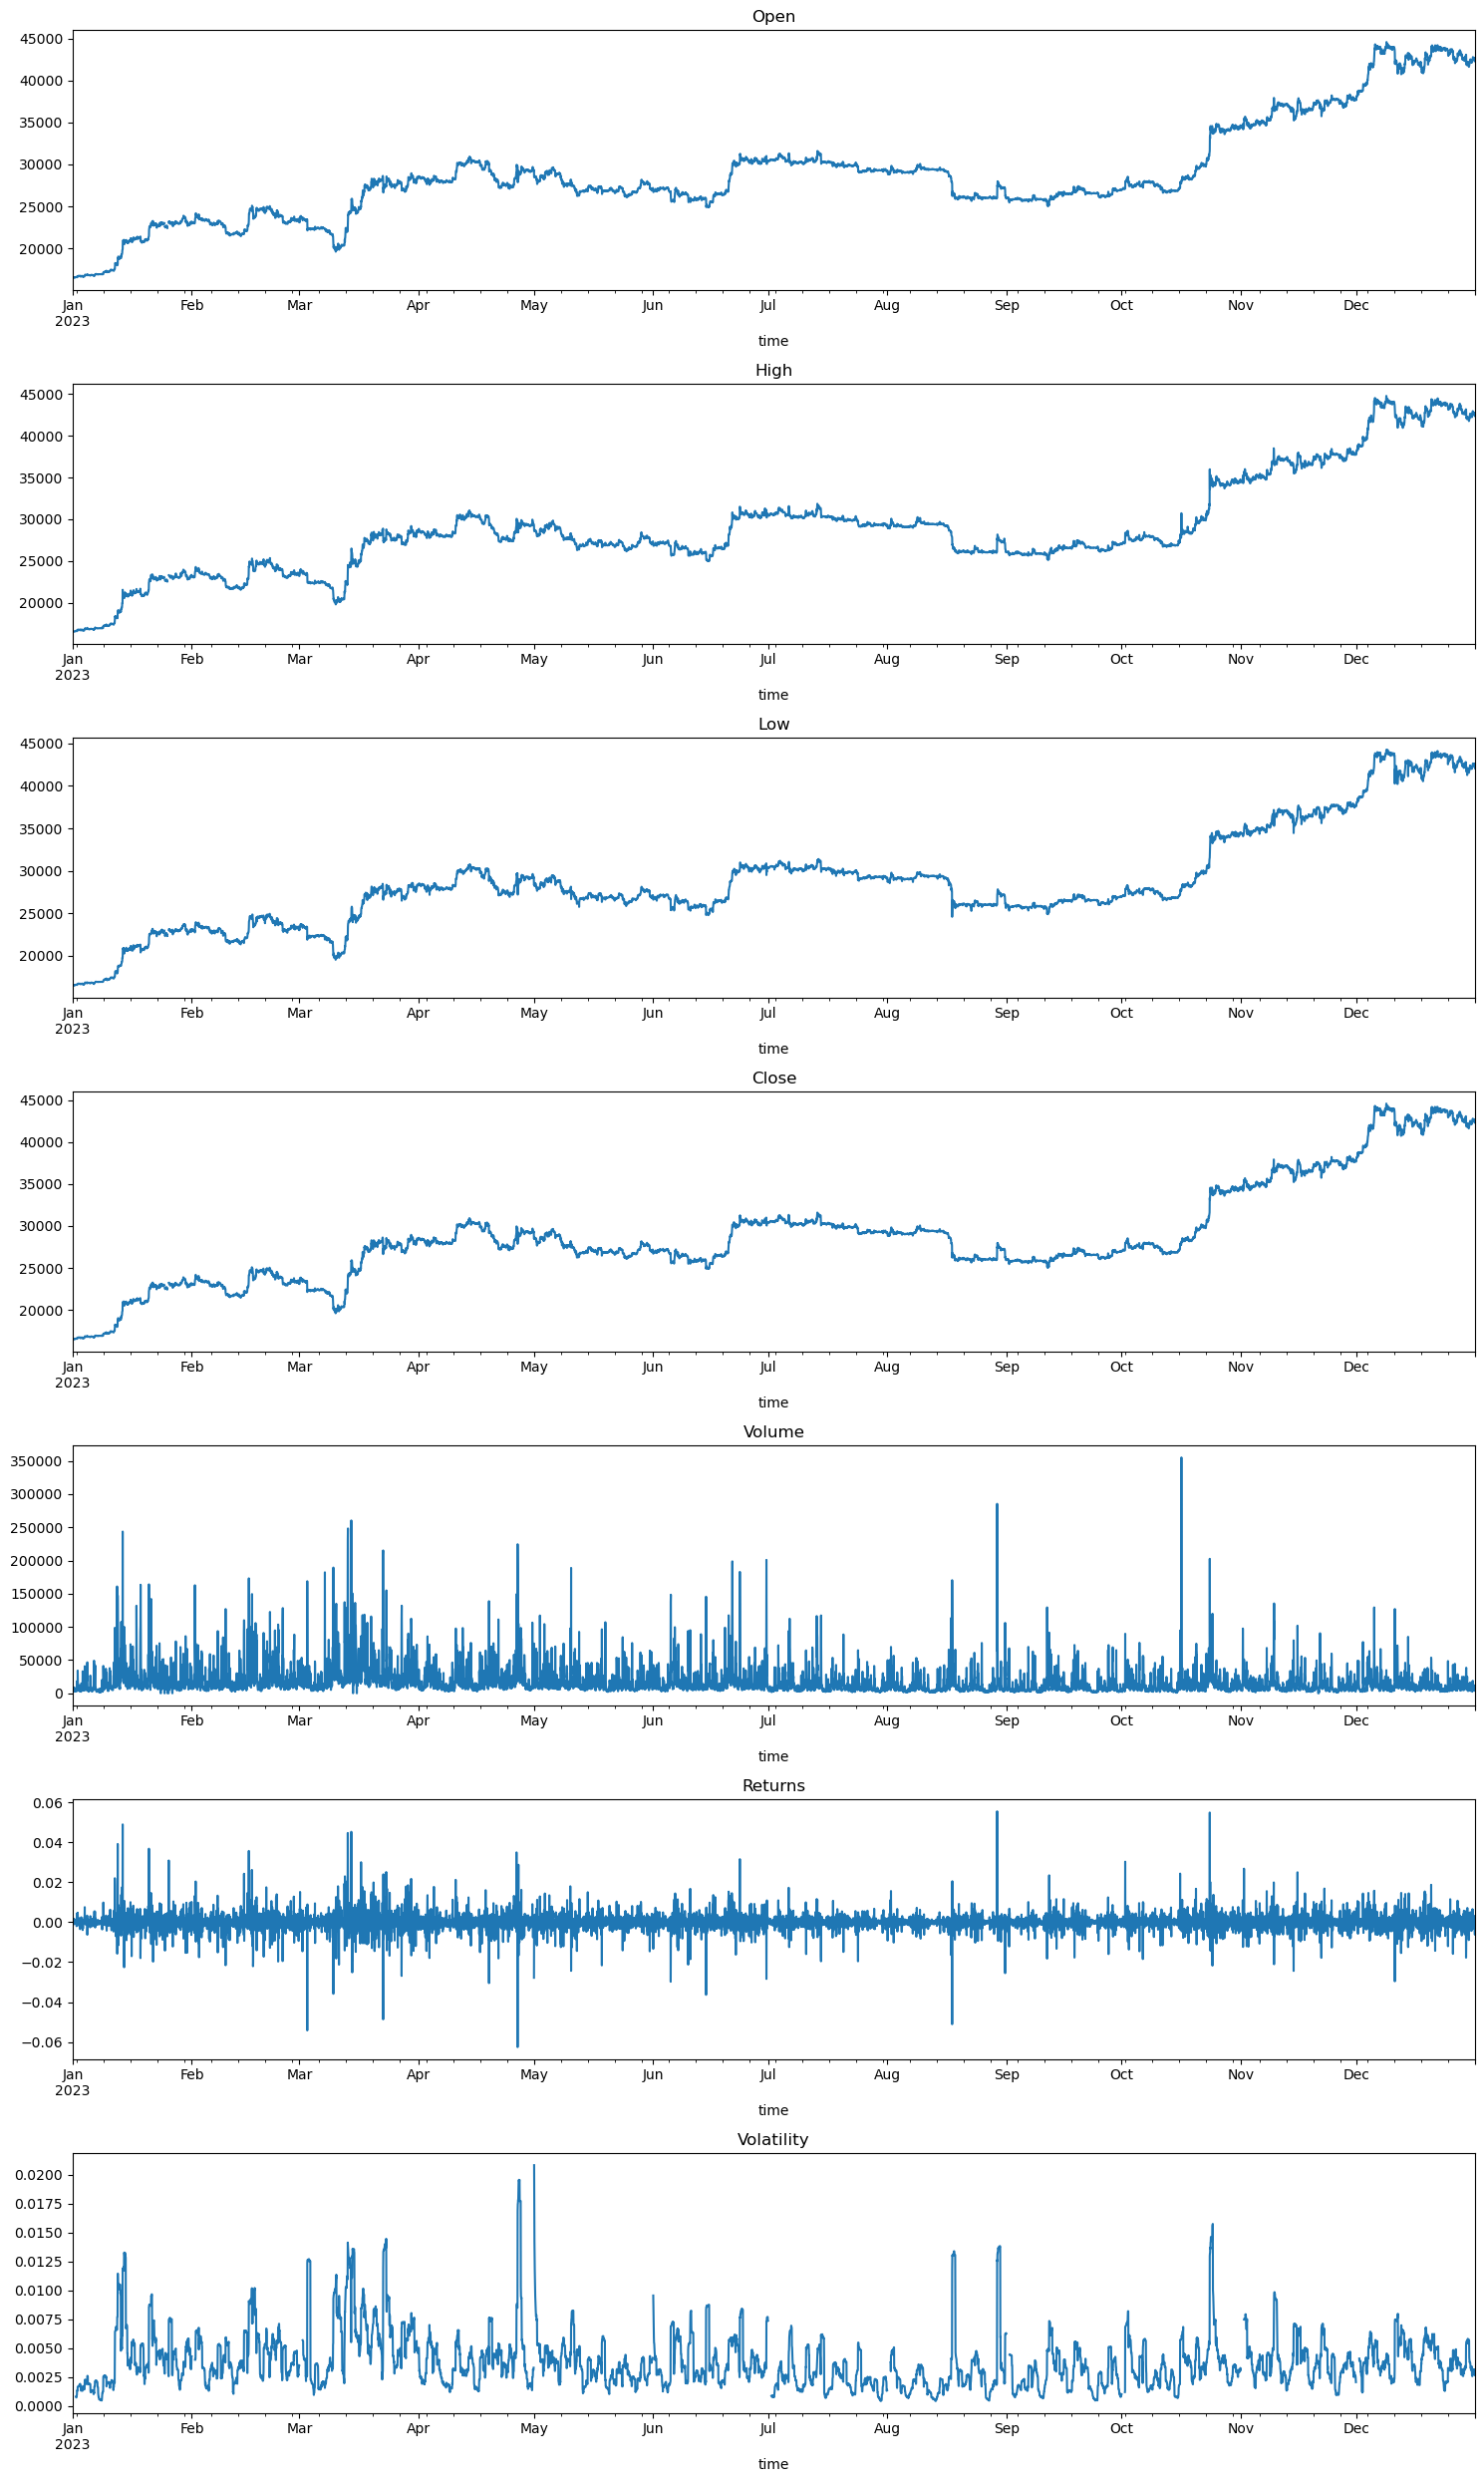

In [19]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(15,25))

df['Open'].plot(ax=ax[0], title='Open')
df['High'].plot(ax=ax[1], title='High')
df['Low'].plot(ax=ax[2], title='Low')
df['Close'].plot(ax=ax[3], title='Close')
df['Volume'].plot(ax=ax[4], title='Volume')
df['returns'].plot(ax=ax[5], title='Returns')
df['volatility'].plot(ax=ax[6], title='Volatility')

# 전체 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


### 금리와 변동성 관계 확인

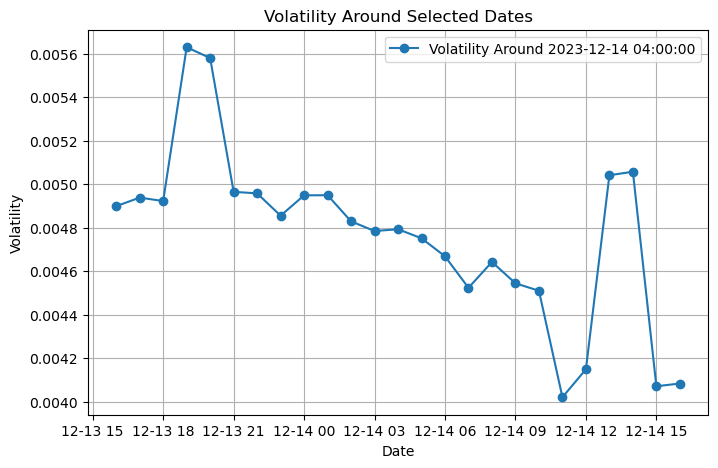

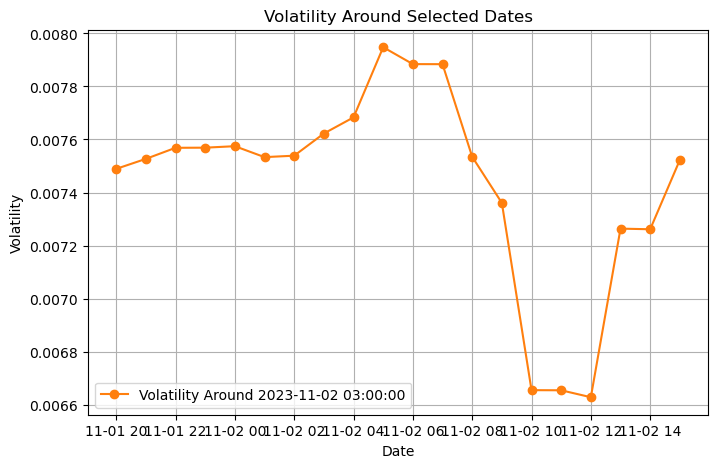

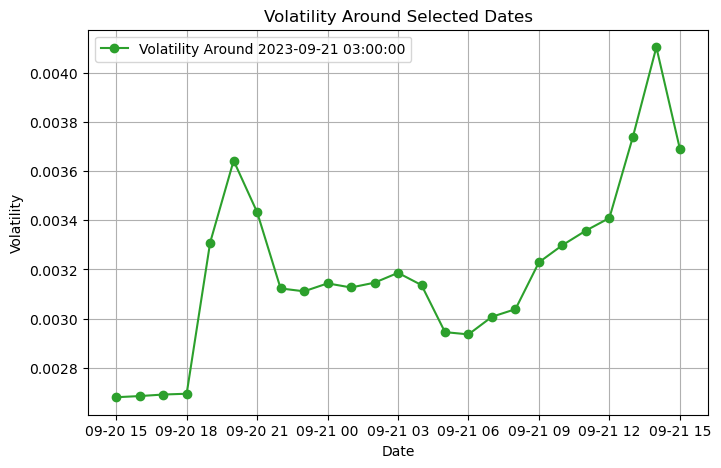

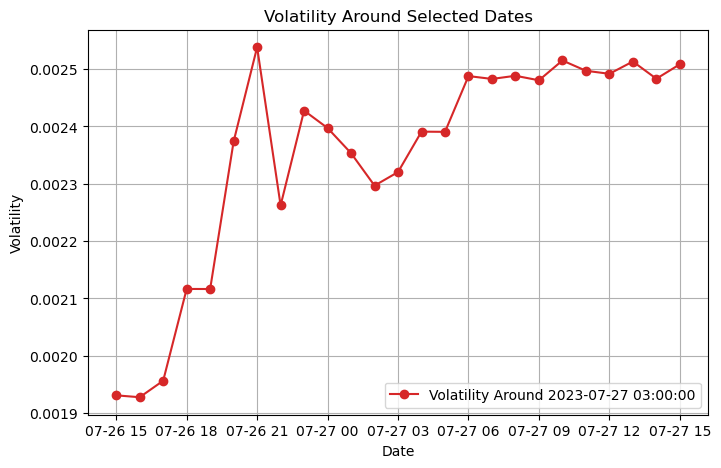

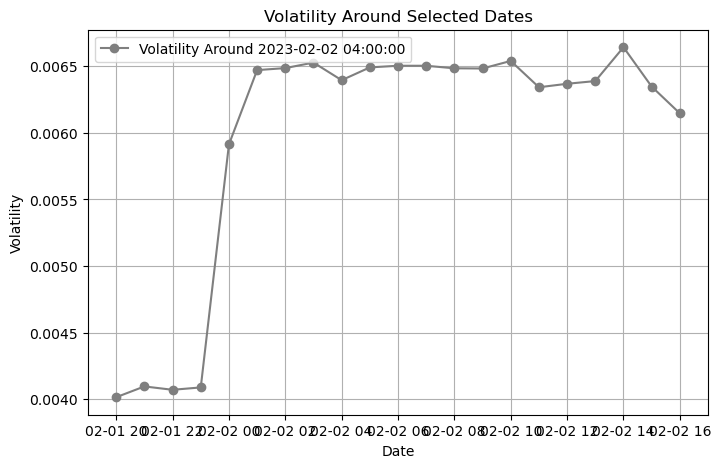

In [23]:
selected_dates = [
    pd.to_datetime('2023-12-14 04:00'),
    pd.to_datetime('2023-11-02 03:00'),
    pd.to_datetime('2023-09-21 03:00'),
    pd.to_datetime('2023-07-27 03:00'),
    pd.to_datetime('2023-06-15 03:00'),
    pd.to_datetime('2023-05-04 03:00'),
    pd.to_datetime('2023-03-23 03:00'),
    pd.to_datetime('2023-02-02 04:00'),
]

for i, selected_date in enumerate(selected_dates):
    selected_start_date = selected_date - pd.DateOffset(hours=12)
    selected_end_date = selected_date + pd.DateOffset(hours=12)
    
    selected_data = df[selected_start_date:selected_end_date]
    
    plt.figure(figsize=(8, 5))
    plt.plot(selected_data.index, selected_data['volatility'], marker='o', label=f'Volatility Around {selected_date}', color=f'C{i}')
    plt.title('Volatility Around Selected Dates')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

단기적인 패턴으로, 금리 인상/인하와의 관계성이 부족 > 장기적인 흐름에서 전체 금리와 반대의 그래프 성격을 띄는 것으로 예상

### ADF

In [27]:
for column in df.columns:
    data_for_adf = df[column]
    
    # ADF 검정 수행
    result = adfuller(data_for_adf)
    
    # 결과 출력
    print(f"Column: {column}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print("-----------------------------------")

Column: Open
ADF Statistic: -0.8601571286724806
p-value: 0.8008100313858324
Critical Values: {'1%': -3.4311335783326355, '5%': -2.8618862874654893, '10%': -2.5669543239683494}
-----------------------------------
Column: High
ADF Statistic: -0.8728155887489936
p-value: 0.796792785779757
Critical Values: {'1%': -3.431132453233407, '5%': -2.8618857903148607, '10%': -2.566954059330716}
-----------------------------------
Column: Low
ADF Statistic: -0.8199525077025598
p-value: 0.8131907998630779
Critical Values: {'1%': -3.4311323596209617, '5%': -2.8618857489500686, '10%': -2.566954037311876}
-----------------------------------
Column: Close
ADF Statistic: -0.8595822115909391
p-value: 0.8009911286427873
Critical Values: {'1%': -3.431132453233407, '5%': -2.8618857903148607, '10%': -2.566954059330716}
-----------------------------------
Column: Volume
ADF Statistic: -9.712430934624807
p-value: 1.0032733007686758e-16
Critical Values: {'1%': -3.431134236135986, '5%': -2.861886578130741, '10%': 

Open, High, Low, Close(-0.86, -0.87, -0.82, -0.86) 따라서 귀무가설을 기각 불가>정상성을 가지지 않음